In [6]:
import cv2
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw
import pandas as pd


In [3]:
N = ord('A') % 5 + 1
print(N)


1


In [8]:
file_name = "D:/LB/LB python/Lab5/kr1.xlsx"
df = pd.read_excel(file_name)

print(df.head())

N = 1 
variant_data = df.iloc[N - 1]
print(variant_data)


   N         file name image size glasses color  line width
0  1  emma-watson2.jpg    300x300           red           2
1  2   emma-watson.jpg    400x400          blue           3
2  3         draco.jpg    700x700          cian           4
3  4    longbottom.jpg    600x600       magenta           5
4  5    ron_wesley.jpg    500x500        yellow           6
N                               1
file name        emma-watson2.jpg
image size                300x300
glasses color                 red
line width                      2
Name: 0, dtype: object


In [9]:
face_cascade_path = "C:/Users/Veremus/AppData/Local/Programs/Python/Python313/Lib/site-packages/cv2/data/haarcascade_frontalface_default.xml"
eye_cascade_path = "C:/Users/Veremus/AppData/Local/Programs/Python/Python313/Lib/site-packages/cv2/data/haarcascade_eye.xml"


In [1]:
import cv2
import matplotlib.pyplot as plt
import math

def process_image(input_image, output_image, face_cascade_path, eye_cascade_path):
    face_cascade = cv2.CascadeClassifier(face_cascade_path)
    eye_cascade = cv2.CascadeClassifier(eye_cascade_path)

    img = cv2.imread(input_image)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    faces = face_cascade.detectMultiScale(
        gray, 
        scaleFactor=1.1, 
        minNeighbors=5, 
        minSize=(50, 50)
    )

    for (x, y, w, h) in faces:
        roi_gray = gray[y:y + h, x:x + w]
        roi_color = img[y:y + h, x:x + w]

        eyes = eye_cascade.detectMultiScale(
            roi_gray, 
            scaleFactor=1.1, 
            minNeighbors=10, 
            minSize=(15, 15)
        )

        eyes = sorted(eyes, key=lambda e: e[2] * e[3], reverse=True)[:2]
        if len(eyes) == 2: 
            left_eye = eyes[0]
            right_eye = eyes[1]

            left_eye_center = (x + left_eye[0] + left_eye[2] // 2, y + left_eye[1] + left_eye[3] // 2)
            right_eye_center = (x + right_eye[0] + right_eye[2] // 2, y + right_eye[1] + right_eye[3] // 2)

            left_eye_radius = max(left_eye[2], left_eye[3]) // 2
            right_eye_radius = max(right_eye[2], right_eye[3]) // 2

            cv2.circle(img, left_eye_center, left_eye_radius, (0, 255, 0), 3)
            cv2.circle(img, right_eye_center, right_eye_radius, (0, 255, 0), 3)

            angle = math.atan2(right_eye_center[1] - left_eye_center[1], 
                               right_eye_center[0] - left_eye_center[0])
            
            left_point = (
                int(left_eye_center[0] + left_eye_radius * math.cos(angle)),
                int(left_eye_center[1] + left_eye_radius * math.sin(angle))
            )
            right_point = (
                int(right_eye_center[0] - right_eye_radius * math.cos(angle)),
                int(right_eye_center[1] - right_eye_radius * math.sin(angle))
            )

            cv2.line(img, left_point, right_point, (0, 255, 0), 3)

            dx = right_eye_center[0] - left_eye_center[0]
            dy = right_eye_center[1] - left_eye_center[1]
            length = math.sqrt(dx**2 + dy**2)

            offset_x = int(0.5 * length) 
            offset_y = int(0.3 * length) 

            cv2.line(img, (left_eye_center[0] - left_eye_radius, left_eye_center[1]),
                     (left_eye_center[0] - left_eye_radius - offset_x, left_eye_center[1] - offset_y), (0, 255, 0), 3)
            cv2.line(img, (right_eye_center[0] + right_eye_radius, right_eye_center[1]),
                     (right_eye_center[0] + right_eye_radius + offset_x, right_eye_center[1] - offset_y), (0, 255, 0), 3)

    cv2.imwrite(output_image, img)

    original_img = cv2.cvtColor(cv2.imread(input_image), cv2.COLOR_BGR2RGB)
    processed_img = cv2.cvtColor(cv2.imread(output_image), cv2.COLOR_BGR2RGB)

    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    plt.imshow(original_img)
    plt.title("Вхідне зображення ")
    plt.axis("off")

    plt.subplot(1, 2, 2)
    plt.imshow(processed_img)
    plt.title("Вихідне зображення")
    plt.axis("off")

    plt.show()
    print(f"Вихідне зображення збережено: {output_image}")


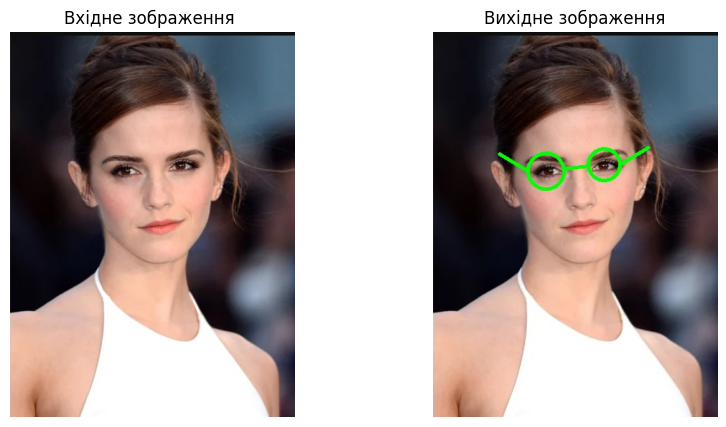

Вихідне зображення збережено: D:/LB/LB python/Lab5/Images/emma-watson2v2.jpg


In [36]:
input_image = "D:/LB/LB python/Lab5/Images/emma-watson2.jpg"
output_image = "D:/LB/LB python/Lab5/Images/emma-watson2v2.jpg"
process_image(input_image, output_image, face_cascade_path, eye_cascade_path)
